# Our goal is to build a classifier using training data, such that given a test sample, we can classify 
(or essentially predict) whether its label is 0 (no divorce) or 1 (divorce).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

load the data

In [2]:
df = pd.read_excel('divorce.xlsx')
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [3]:
df.shape

(170, 55)

In [4]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [5]:
df.isna().sum()# no nulls in dataset

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

split data to 60-20-20 train, val, test

In [6]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)#they use random state 42#does this matter
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
#print(df_train)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['Class'].values
y_val = df_val['Class'].values
y_test = df_test['Class'].values

del df_train['Class']
del df_val['Class']
del df_test['Class']

DictVectorizer -> apply one-hot encoding to categorical features and get the feature matrix
(turn train and validation into matrices)

In [7]:
features = ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54']

In [8]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')#don't exclude Class which is the response variable????
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [9]:
X_train.shape

(102, 54)

In [10]:
X_val.shape

(34, 54)

# Train a decision tree classifier to predict the Class variable

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn import metrics

# Fit the tree with default parameters

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- Atr18 <= 1.50
|   |--- Atr3 <= 3.00
|   |   |--- class: 0
|   |--- Atr3 >  3.00
|   |   |--- class: 1
|--- Atr18 >  1.50
|   |--- class: 1



# Atr18 is used to split the data

Evaluating the quality of the model with AUC

In [14]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [15]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9666666666666667

In [16]:
#dt2 = DecisionTreeClassifier(max_depth=2)
#dt2.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 1.000
val auc: 0.967


Try diferent values of max_depth

In [17]:
scores = []


for n in range(1, 200, 1):
    dt2 = DecisionTreeClassifier(max_depth=n)
    dt2.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [18]:
scores

[(1, 0.9666666666666667),
 (2, 0.9666666666666667),
 (3, 0.9666666666666667),
 (4, 0.9666666666666667),
 (5, 0.9666666666666667),
 (6, 0.9666666666666667),
 (7, 0.9666666666666667),
 (8, 0.9666666666666667),
 (9, 0.9666666666666667),
 (10, 0.9666666666666667),
 (11, 0.9666666666666667),
 (12, 0.9666666666666667),
 (13, 0.9666666666666667),
 (14, 0.9666666666666667),
 (15, 0.9666666666666667),
 (16, 0.9666666666666667),
 (17, 0.9666666666666667),
 (18, 0.9666666666666667),
 (19, 0.9666666666666667),
 (20, 0.9666666666666667),
 (21, 0.9666666666666667),
 (22, 0.9666666666666667),
 (23, 0.9666666666666667),
 (24, 0.9666666666666667),
 (25, 0.9666666666666667),
 (26, 0.9666666666666667),
 (27, 0.9666666666666667),
 (28, 0.9666666666666667),
 (29, 0.9666666666666667),
 (30, 0.9666666666666667),
 (31, 0.9666666666666667),
 (32, 0.9666666666666667),
 (33, 0.9666666666666667),
 (34, 0.9666666666666667),
 (35, 0.9666666666666667),
 (36, 0.9666666666666667),
 (37, 0.9666666666666667),
 (38, 0.96

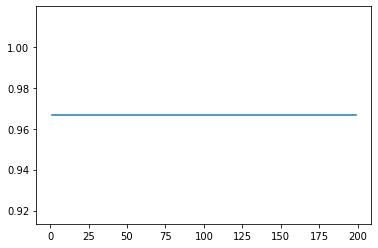

In [19]:
df_scores = pd.DataFrame(scores, columns = ['max_depth','auc'])
plt.plot(df_scores['max_depth'],df_scores['auc'])

The AUC is high acros all values of max_depth for a single tree.
Train a random forest and see if we can increase the AUC

try different values of max_depth and n_estimators

In [20]:
from tqdm.auto import tqdm
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestClassifier(n_estimators=0,max_depth = d, random_state=1,n_jobs=-1,warm_start = True)
    
    for n in tqdm (range(10, 201, 10)):
        rf.n_estimators=n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        #rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))

        scores.append((d, n, auc))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [21]:
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,max_depth,n_estimators,auc
0,10,10,1.0
1,10,20,1.0
2,10,30,1.0
3,10,40,1.0
4,10,50,1.0
...,...,...,...
75,25,160,1.0
76,25,170,1.0
77,25,180,1.0
78,25,190,1.0


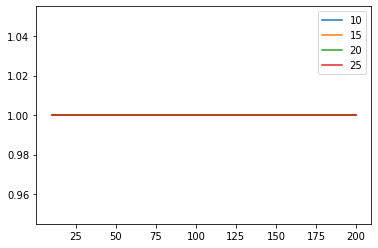

In [22]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot( df_subset['n_estimators'], df_subset['auc'], label = d)
plt.legend()

# All combinations of max_depth and n_estimators = AUC 1

In [23]:
from tqdm.auto import tqdm
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestClassifier(n_estimators=0,max_depth = d, random_state=420,n_jobs=-1,warm_start = True)
    
    for n in tqdm (range(10, 201, 10)):
        rf.n_estimators=n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        
        #rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))

        scores.append((d, n, auc))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [24]:
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,max_depth,n_estimators,auc
0,10,10,1.0
1,10,20,1.0
2,10,30,1.0
3,10,40,1.0
4,10,50,1.0
...,...,...,...
75,25,160,1.0
76,25,170,1.0
77,25,180,1.0
78,25,190,1.0


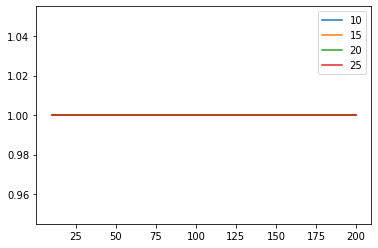

In [25]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot( df_subset['n_estimators'], df_subset['auc'], label = d)
plt.legend()

# Final Model

In [26]:
rf = RandomForestClassifier(n_estimators=10,
max_depth=10,
random_state=1,
n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1, random_state=1)

# Feature importance analysis

In [27]:
rf.feature_importances_

array([0.00387164, 0.        , 0.11023488, 0.07835951, 0.        ,
       0.        , 0.        , 0.00382387, 0.        , 0.00125577,
       0.00389128, 0.00385648, 0.18822365, 0.00764618, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01626104, 0.00057544, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00984807, 0.        , 0.16037705,
       0.        , 0.        , 0.        , 0.00265107, 0.30789614,
       0.        , 0.        , 0.        , 0.00202381, 0.        ,
       0.        , 0.        , 0.        , 0.00582624, 0.        ,
       0.        , 0.        , 0.00060469, 0.0005744 , 0.00335041,
       0.        , 0.        , 0.        , 0.0888484 ])

# The 5 most important features for determining divorce or no divorce

In [28]:
df_importance = pd.DataFrame()
df_importance['feature'] = dv.get_feature_names()
df_importance['importance'] = rf.feature_importances_
df_importance.sort_values(by = 'importance', ascending = False).head()

,feature,importance
34,Atr40,0.307896
12,Atr20,0.188224
29,Atr36,0.160377
2,Atr11,0.110235
53,Atr9,0.088848
